Pennylane prototype

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 36.5 MB/s eta 0:00:00


In [ ]:
import pennylane as qml

def my_quantum_function(params):

    # Single-qubit operations with no input parameters
    qml.Gate1(wires=0)
    qml.Gate2(wires=1)

    # A single-qubit operation with an input parameter
    qml.Gate3(params[0], wires=0)

    # Two-qubit operation with no input parameter on wires 0 and 1
    qml.TwoQubitGate1(wires=[0, 1])

    # Two-qubit operation with an input parameter on wires 0 and 1
    qml.TwoQubitGate2(params[1], wires=[0, 1])

    # Return the result of a measurement
    return qml.Measurement(wires=[0, 1])

In [2]:
import pennylane as qml

I.2.1. The code below is a quantum function with all the gates from the above circuit (which we reproduce here for convenience). However, the gates are out of order! Re-arrange the lines of the function to match the order of operations in the circuit.

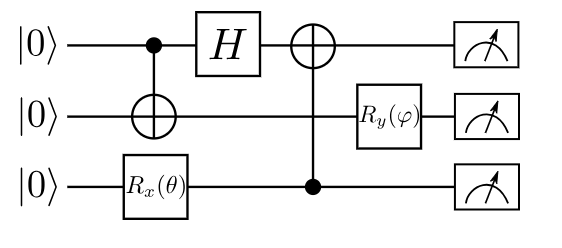

In [ ]:

def my_circuit(theta, phi):

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    return qml.probs(wires=[0, 1, 2])

 I.2.2. Complete the quantum function in the PennyLane code below to implement the following quantum circuit. We'll then construct a QNode, and run the circuit on the provided device.

 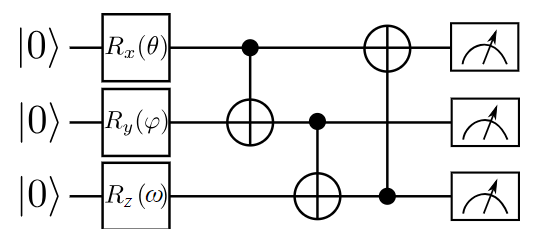

In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):
    qml.RX(theta,wires=0)
    qml.RY(phi,wires=1)
    qml.RZ(omega,wires=2)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])
    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

 I.2.3. The quantum function below implements the circuit from the previous exercise. Apply a decorator to the quantum function to construct a QNode, then run it using the provided input parameters.

In [3]:
dev = qml.device("default.qubit", wires=3)
@qml.qnode(dev)

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
my_circuit(theta,phi,omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

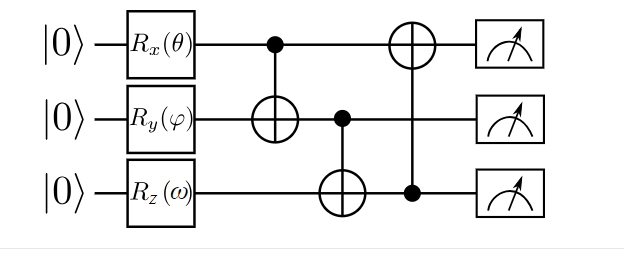


I.2.4. What is the depth of the circuit in the picture above?

In [4]:
dev=qml.device('default.qubit',wires=3)
@qml.qnode(dev)
def my_circuit(theta,phi,omega):
  qml.RX(theta,wires=0)
  qml.RY(phi,wires=1)
  qml.RZ(omega,wires=2)
  qml.CNOT(wires=[0,1])
  qml.CNOT(wires=[1,2])
  qml.CNOT(wires=[2,0])
  return qml.probs(wires=[0,1,2])

depth=4